In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
plt.rcParams['font.sans-serif'] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

In [4]:
shop_data = pd.read_csv('online_shopping_10_cats.csv')

In [5]:
shop_data.label.value_counts()

1    31728
0    31046
Name: label, dtype: int64

In [6]:
shop_data=shop_data[['cat','review']]
print("数据总量: %d ." % len(shop_data))
shop_data.sample(10)

数据总量: 62774 .


,cat,review
9939,平板,这价格波动简直了，**感觉分分钟的事～还没寄到就掉了**手机电池很耐用，就是没有悬浮窗是什么意思～
18871,水果,打开包装有一股味道，不是苹果香，可能是包装散发出来的异味，整整12个，大小比较均匀，迫不及待...
53663,酒店,"绝对超值的酒店!离海边很近,走过场分钟就到码头,可以直接乘船去鼓浪屿.地理位置非常好,从酒店..."
40625,衣服,宝贝非常好穿起来非常舒服比较满意
44132,衣服,其他都好，一般的棉料。只是这个标签牌会戳死人的你们那么多年就不知道改进一下？只是这个标签牌会...
1801,书籍,产品细分策略是值得学习的，王文京个人对客户的那种热情也是值得学习的。不过用友的执行力似乎一般...
33312,洗发水,昨天购买京东*天下午14点秒*。15点我收到的商品，东西还到手价格就降了，这样对同样在京东消...
16346,水果,苹果已收到，包装完好分量足，各大很脆很甜，个个都很好，谢谢，下次还回来买
17886,水果,非常新鲜，送货很神速哈！大热天不用去开车去超市买了。
34955,洗发水,刚收到还没用不知道好不好


In [7]:
print("在 cat 列中总共有 %d 个空值." % shop_data['cat'].isnull().sum())
print("在 review 列中总共有 %d 个空值." % shop_data['review'].isnull().sum())
shop_data[shop_data.isnull().values==True]
shop_data = shop_data[pd.notnull(shop_data['review'])]

在 cat 列中总共有 0 个空值.
在 review 列中总共有 1 个空值.


In [8]:
d = {'cat':shop_data['cat'].value_counts().index, 'count': shop_data['cat'].value_counts()}
df_cat = pd.DataFrame(data=d).reset_index(drop=True)
df_cat["cat"]=['tablet', 'fruit', 'shampoo', 'clothes','hotel','computer','Book','mobile phone','Mengniu','water heater']
df_cat

,cat,count
0,tablet,10000
1,fruit,10000
2,shampoo,10000
3,clothes,10000
4,hotel,10000
5,computer,3992
6,Book,3851
7,mobile phone,2323
8,Mengniu,2033
9,water heater,574


In [72]:
df_cat.T[0].to_list()

['tablet', 10000]

Text(0.5, 0, '类目')

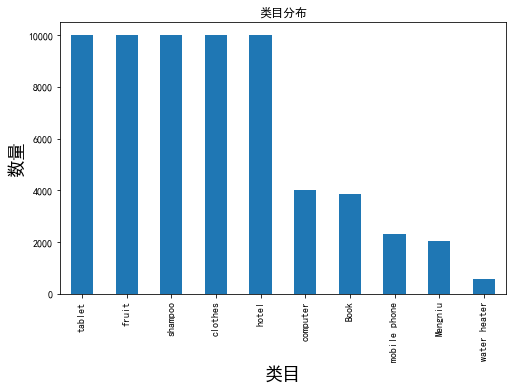

In [9]:
df_cat.plot(x='cat', y='count', kind='bar', legend=False,  figsize=(8, 5))
plt.title("类目分布")
plt.ylabel('数量', fontsize=18)
plt.xlabel('类目', fontsize=18)

In [10]:
shop_data['cat_id'] = shop_data['cat'].factorize()[0]
cat_id_df = shop_data[['cat', 'cat_id']].drop_duplicates().sort_values('cat_id').reset_index(drop=True)
cat_to_id = dict(cat_id_df.values)
id_to_cat = dict(cat_id_df[['cat_id', 'cat']].values)
shop_data.sample(10)

,cat,review,cat_id
22576,水果,上当受骗了，苹果根本就不值这么多钱，还不如超市5块多的，也是打蜡的，歪瓜劣枣比较多，颜色也不...,3
28387,洗发水,好，非常好，和以前在超市买的气味一样，618活动购买真划算！,4
47220,衣服,不喜欢紧身的，买错了，伤心,7
21664,水果,个头不大，一般般吧。分量没有称，不知道呢怎么样，慎重选择吧。买的时候59.9,3
2264,书籍,这本书孩子不感兴趣。 把书本都给撕了。,0
9152,平板,唉，换了一次，结果这个比那个耗电还快，还发热，最重要的是耗电快，视频时充电充不进、、、、、、...,1
14339,手机,机身金属质感很强，做工精细；按键手感舒适；屏幕显示效果不错；摄像头取景速度较快；具备短信群发...,2
5300,平板,还可以 手感挺不错 屏幕刚好 还在更新不知道效果怎么样 个人感觉华为平板是在国产里做的不错的了。,1
58057,酒店,根本不配四星 再也不会选择入住 住的最好的豪华楼层 房间小得出奇 也没有浴缸 入住的特殊要求...,9
13222,平板,快递太慢，下载文件太慢了，不好用。,1


In [11]:
cat_id_df.to_csv('cat_id.csv', index=False)

In [12]:
import re

In [13]:
#定义删除除字母,数字，汉字以外的所有符号的函数
def remove_punctuation(line):
    line = str(line)
    if line.strip()=='':
        return ''
    rule = re.compile(u"[^a-zA-Z0-9\u4E00-\u9FA5]")
    line = rule.sub('',line)
    return line
 
def stopwordslist(filepath):  
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]  
    return stopwords  
 
#加载停用词
stopwords = stopwordslist("stopwords.txt")

In [14]:
shop_data['clean_review'] = shop_data['review'].apply(remove_punctuation)
shop_data.sample(10)

,cat,review,cat_id,clean_review
9008,平板,质量还行吧，但是电池太不经用，还是太小，开机键太硬，要用力按才有反应，不知道是设计就是这样还...,1,质量还行吧但是电池太不经用还是太小开机键太硬要用力按才有反应不知道是设计就是这样还是品控问题...
24931,水果,萍果收到了，但是遗憾的是萍果与图片相差太大，名不符实。商家一点都没诚信。,3,萍果收到了但是遗憾的是萍果与图片相差太大名不符实商家一点都没诚信
54683,酒店,本人是第一次去襄樊，记得那天到襄樊已经是10月3号凌晨三点多，我通过携程定的是10月3号的房...,9,本人是第一次去襄樊记得那天到襄樊已经是10月3号凌晨三点多我通过携程定的是10月3号的房酒店...
19840,水果,是不是烟台的就不知道了，一般般吧,3,是不是烟台的就不知道了一般般吧
57170,酒店,住的是8楼豪海房，每天就在海边度过，一个字， 爽！酒店服务不错，路上遇见都会微笑问好，早餐还...,9,住的是8楼豪海房每天就在海边度过一个字爽酒店服务不错路上遇见都会微笑问好早餐还算丰富而且到1...
6783,平板,都不错，就是当天晚上没送到,1,都不错就是当天晚上没送到
32828,洗发水,东西刚收到，不过买错了，以为是750ml的，这个去屑效果差，头容易痒痒，但是凑合用吧,4,东西刚收到不过买错了以为是750ml的这个去屑效果差头容易痒痒但是凑合用吧
51588,计算机,为什么不预装xp？硬盘初始分区只有一个，此产品的工程师自己不用电脑？,8,为什么不预装xp硬盘初始分区只有一个此产品的工程师自己不用电脑
43777,衣服,裤子质量很不错，穿着很舒服，以后还会再来~,7,裤子质量很不错穿着很舒服以后还会再来
37701,蒙牛,蒙牛的包装变得很简单，之前的什么荣誉，什么免检，通通不见了，希望它能做好质量，做好品牌，真的...,6,蒙牛的包装变得很简单之前的什么荣誉什么免检通通不见了希望它能做好质量做好品牌真的无添加


In [15]:
import jieba

In [16]:
#分词，并过滤停用词
shop_data['cut_review'] = shop_data['clean_review'].apply(lambda x: " ".join([w for w in list(jieba.lcut(x)) if w not in stopwords]))
shop_data.head()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\PC\AppData\Local\Temp\jieba.cache
Loading model cost 0.276 seconds.
Prefix dict has been built successfully.


,cat,review,cat_id,clean_review,cut_review
0,书籍,﻿做父母一定要有刘墉这样的心态，不断地学习，不断地进步，不断地给自己补充新鲜血液，让自己保持...,0,做父母一定要有刘墉这样的心态不断地学习不断地进步不断地给自己补充新鲜血液让自己保持一颗年轻的...,做 父母 刘墉 心态 学习 补充 新鲜血液 一颗 年轻 心 想 很 好 孩子 沟通 一个 因...
1,书籍,作者真有英国人严谨的风格，提出观点、进行论述论证，尽管本人对物理学了解不深，但是仍然能感受到...,0,作者真有英国人严谨的风格提出观点进行论述论证尽管本人对物理学了解不深但是仍然能感受到真理的火...,作者 真有 英国人 严谨 风格 提出 观点 论述 论证 本人 物理学 不深 感受 真理 火花...
2,书籍,作者长篇大论借用详细报告数据处理工作和计算结果支持其新观点。为什么荷兰曾经县有欧洲最高的生产...,0,作者长篇大论借用详细报告数据处理工作和计算结果支持其新观点为什么荷兰曾经县有欧洲最高的生产率...,作者 长篇大论 借用 详细 报告 数据处理 工作 计算结果 支持 其新 观点 荷兰 县有 欧...
3,书籍,作者在战几时之前用了＂拥抱＂令人叫绝．日本如果没有战败，就有会有美军的占领，没胡官僚主义的延...,0,作者在战几时之前用了拥抱令人叫绝日本如果没有战败就有会有美军的占领没胡官僚主义的延续没有战后...,作者 战 拥抱 令人 叫绝 日本 战败 会 美军 占领 没胡 官僚主义 延续 战后 民发 反...
4,书籍,作者在少年时即喜阅读，能看出他精读了无数经典，因而他有一个庞大的内心世界。他的作品最难能可贵...,0,作者在少年时即喜阅读能看出他精读了无数经典因而他有一个庞大的内心世界他的作品最难能可贵的有两...,作者 少年 时即 喜 阅读 精读 无数 经典 一个 庞大 内心世界 作品 最 难能可贵 两点...


In [17]:
from keras.preprocessing.text import Tokenizer

In [18]:
# 设置最频繁使用的50000个词
MAX_NB_WORDS = 50000
# 每条cut_review最大的长度
MAX_SEQUENCE_LENGTH = 250
# 设置Embeddingceng层的维度
EMBEDDING_DIM = 100
 
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(shop_data['cut_review'].values)
word_index = tokenizer.word_index
print('共有 %s 个不相同的词语.' % len(word_index))

共有 70200 个不相同的词语.


In [30]:
import pickle 

with open('tokenizer.pickle', 'wb') as handle: 
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL) 

In [19]:
from keras.preprocessing.sequence import pad_sequences

In [20]:
X = tokenizer.texts_to_sequences(shop_data['cut_review'].values)
#填充X,让X的各个列的长度统一
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
 
#多类标签的onehot展开
Y = pd.get_dummies(shop_data['cat_id']).values
 
print(X.shape)
print(Y.shape)

(62773, 250)
(62773, 10)


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
#拆分训练集和测试集
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(56495, 250) (56495, 10)
(6278, 250) (6278, 10)


In [23]:
from keras.models import Sequential

In [24]:
from keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D

In [25]:
from keras.callbacks import EarlyStopping

In [30]:
#定义模型
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
# model.add(LSTM(100, dropout=0.2))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 250, 100)          5000000   
                                                                 
 spatial_dropout1d_4 (Spatia  (None, 250, 100)         0         
 lDropout1D)                                                     
                                                                 
 lstm_7 (LSTM)               (None, 128)               117248    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 5,118,538
Trainable params: 5,118,538
Non-trainable params: 0
_________________________________________________________________


In [31]:
epochs = 10
batch_size = 64
 
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10
795/795 [==============================] - 16s 16ms/step - loss: 0.8030 - accuracy: 0.7330 - val_loss: 0.3866 - val_accuracy: 0.8754
Epoch 2/10
795/795 [==============================] - 13s 16ms/step - loss: 0.3064 - accuracy: 0.8969 - val_loss: 0.3702 - val_accuracy: 0.8781
Epoch 3/10
795/795 [==============================] - 13s 16ms/step - loss: 0.2199 - accuracy: 0.9264 - val_loss: 0.3353 - val_accuracy: 0.8871
Epoch 4/10
795/795 [==============================] - 13s 16ms/step - loss: 0.1750 - accuracy: 0.9409 - val_loss: 0.3514 - val_accuracy: 0.8878
Epoch 5/10
795/795 [==============================] - 13s 16ms/step - loss: 0.1492 - accuracy: 0.9471 - val_loss: 0.3691 - val_accuracy: 0.8865
Epoch 6/10
795/795 [==============================] - 13s 16ms/step - loss: 0.1342 - accuracy: 0.9541 - val_loss: 0.3739 - val_accuracy: 0.8862


In [32]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('测试损失：%f 测试准确率: %f' % (test_loss, test_acc))

197/197 [==============================] - 1s 6ms/step - loss: 0.3802 - accuracy: 0.8832
测试损失：0.380187 测试准确率: 0.883243


In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
pd.DataFrame([acc, val_acc, loss, val_loss], index=['acc', 'val_acc', 'loss', 'val_loss']).T.to_csv('Indicator_cat10.csv')

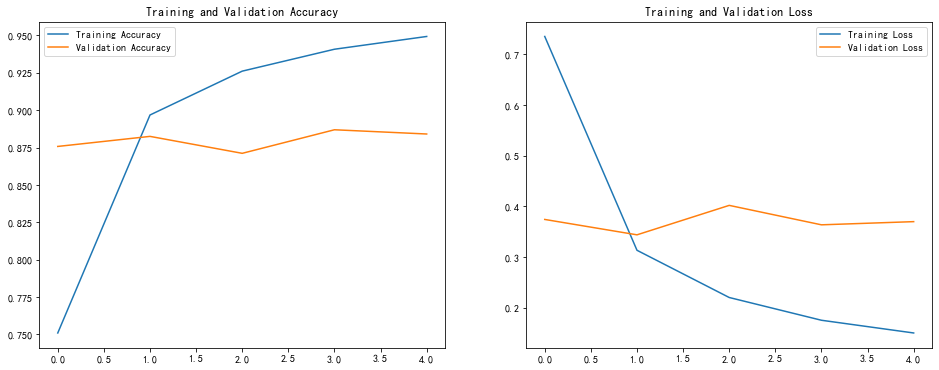

In [68]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [48]:
model.save('shopping_10_cats.h5')

In [43]:
from sklearn.metrics import classification_report

In [44]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis = 1)
Y_test = Y_test.argmax(axis = 1)

In [62]:
pd.DataFrame(classification_report(Y_test, y_pred, output_dict=True, target_names=['Book','tablet','mobile phone','fruit','shampoo','water heater','Mengniu','clothes','computer','hotel'])).to_csv('classification_report.csv')

In [66]:
print(classification_report(Y_test, y_pred, target_names=['Book','tablet','mobile phone','fruit','shampoo','water heater','Mengniu','clothes','computer','hotel']))

              precision    recall  f1-score   support

        Book       0.97      0.93      0.95       373
      tablet       0.77      0.83      0.80       998
mobile phone       0.86      0.83      0.85       250
       fruit       0.90      0.90      0.90       965
     shampoo       0.82      0.82      0.82      1006
water heater       0.74      0.46      0.57        54
     Mengniu       1.00      1.00      1.00       204
     clothes       0.90      0.88      0.89       992
    computer       0.89      0.90      0.89       400
       hotel       0.99      0.97      0.98      1036

    accuracy                           0.88      6278
   macro avg       0.88      0.85      0.86      6278
weighted avg       0.88      0.88      0.88      6278



In [19]:
def predict(text):
    txt = remove_punctuation(text)
    txt = [" ".join([w for w in list(jieba.cut(txt)) if w not in stopwords])]
    seq = tokenizer.texts_to_sequences(txt)
    padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
    pred = model.predict(padded)
    cat_id= pred.argmax(axis=1)[0]
    return cat_id_df[cat_id_df.cat_id==cat_id]['cat'].values[0]

In [56]:
predict('苹果好吃又不贵，已经买了很多次了')

'水果'

In [57]:
predict('收到产品已经半个多月了，一开始用着不太好用，慢慢的就好使了，可能是习惯问题吧，主要是屏的分辨率真的不错。')

'平板'

In [58]:
predict('可能中外文化理解差异，可能与小孩子太有代沟，不觉得怎么样，还是比较喜欢水墨画一点风格的漫画书，但愿我女儿长大点能喜欢（22个月中)')

'书籍'

In [59]:
predict('假的，不好用，头皮痒的要命。。。')

'洗发水'

In [60]:
predict('这是第三次点评，纯粹是为了拿积分。没什么可以多说了，服务不错。')

'酒店'

-----

In [20]:
import requests
import random
import json
from hashlib import md5

In [21]:
def translate(string):    
    # Set your own appid/appkey.
    appid = '20220911001339781'
    appkey = 'oGkv8qDxc1lQjeiA0nQW'

    # For list of language codes, please refer to `https://api.fanyi.baidu.com/doc/21`
    from_lang = 'en'
    to_lang =  'zh'

    endpoint = 'http://api.fanyi.baidu.com'
    path = '/api/trans/vip/translate'
    url = endpoint + path

    query = string

    # Generate salt and sign
    def make_md5(s, encoding='utf-8'):
        return md5(s.encode(encoding)).hexdigest()

    salt = random.randint(32768, 65536)
    sign = make_md5(appid + query + str(salt) + appkey)

    # Build request
    headers = {'Content-Type': 'application/x-www-form-urlencoded'}
    payload = {'appid': appid, 'q': query, 'from': from_lang, 'to': to_lang, 'salt': salt, 'sign': sign}

    # Send request
    r = requests.post(url, params=payload, headers=headers)
    result = r.json()
    return result["trans_result"][0]["dst"]